# Comparing Each Iteration

In [4]:
import pandas as pd
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

cols_to_keep = df_one.Responsibility_Key
df_zero = df_zero[df_zero["Responsibility_Key"].isin(cols_to_keep)]

def stats_describe(df):
    stats_df = df.describe()
    styled_df = DataFrameStyler(stats_df)
    display(styled_df.style_numeric_columns_with_gradient(decimal_points=2))

stats_describe(df_zero)
stats_describe(df_one)



,bert_score_precision,soft_similarity,word_movers_distance,deberta_entailment_score
count,300.00,300.00,300.00,300.00
mean,0.83,0.26,5.09,0.08
std,0.02,0.11,0.91,0.14
min,0.78,0.03,3.61,0.00
25%,0.82,0.19,4.36,0.01
50%,0.83,0.26,4.90,0.03
75%,0.84,0.33,5.57,0.08
max,0.88,0.56,8.19,0.88


,bert_score_precision,soft_similarity,word_movers_distance,deberta_entailment_score
count,300.00,300.00,300.00,300.00
mean,0.85,0.39,4.77,0.33
std,0.03,0.21,1.00,0.40
min,0.77,0.02,2.45,0.00
25%,0.83,0.23,4.12,0.01
50%,0.85,0.38,4.69,0.06
75%,0.87,0.55,5.39,0.84
max,0.95,0.92,8.25,0.99


array([[<Axes: title={'center': 'bert_score_precision'}>,
        <Axes: title={'center': 'soft_similarity'}>],
       [<Axes: title={'center': 'word_movers_distance'}>,
        <Axes: title={'center': 'deberta_entailment_score'}>]],
      dtype=object)

array([[<Axes: title={'center': 'bert_score_precision'}>,
        <Axes: title={'center': 'soft_similarity'}>],
       [<Axes: title={'center': 'word_movers_distance'}>,
        <Axes: title={'center': 'deberta_entailment_score'}>]],
      dtype=object)

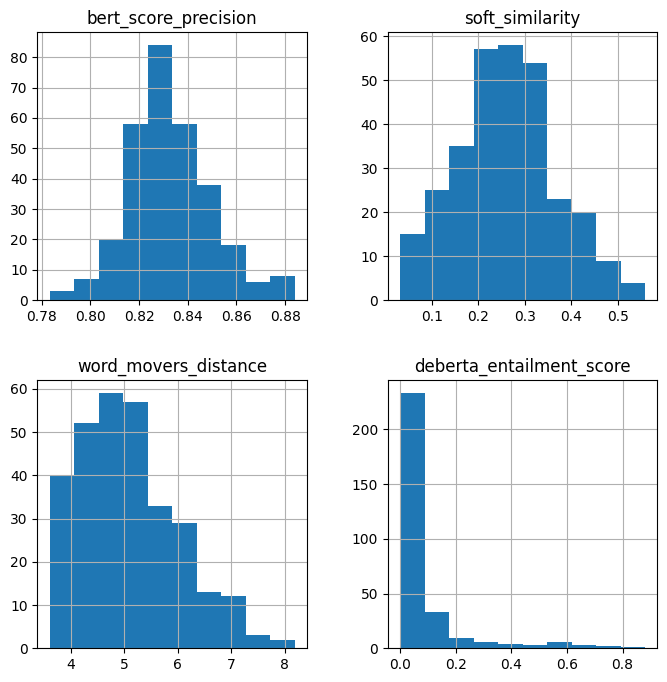

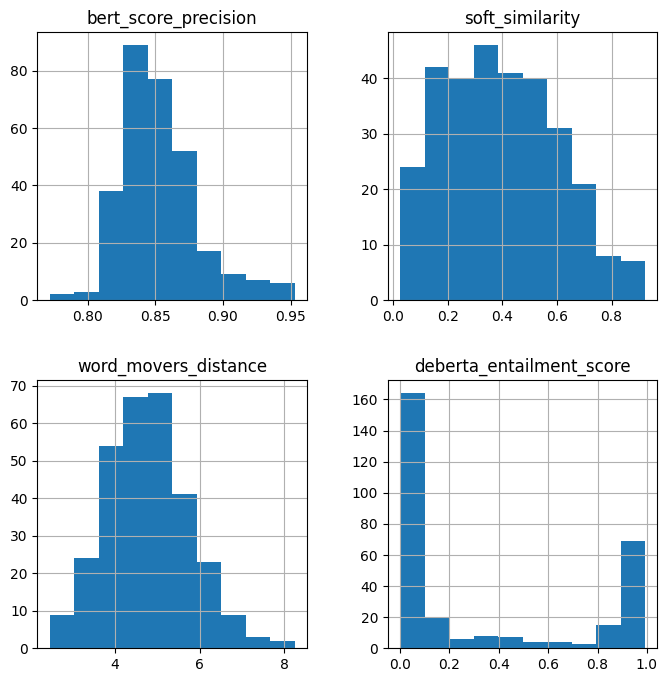

In [66]:
# Histogram

import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

cols_to_keep = df_one.Responsibility_Key
df_zero = df_zero[df_zero["Responsibility_Key"].isin(cols_to_keep)]

display(df_zero.hist(bins=10, figsize=(8, 8)))
display(df_one.hist(bins=10, figsize=(8, 8)))


## Compare Two Interations' Metrics

In [2]:

import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display
from evaluation_optimization.similarity_metric_improvements import compare_metric_changes

file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

# Exclude items from comparison
cols_to_keep = df_one.Responsibility_Key
df_zero = df_zero[df_zero["Responsibility_Key"].isin(cols_to_keep)]


# Analysis
df = compare_metric_changes(df_zero, df_one, include_stats=False)

styled_df = DataFrameStyler(df)

display(styled_df.style_numeric_columns_with_gradient(decimal_points=3))

Number of rows: 300
Number of columns: 22


c:\github\job_bot\src\evaluation_optimization\similarity_metric_improvements.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change.loc[:, "total_change"] = (


,Responsibility_Key,Requirement_Key,bert_score_precision_change,deberta_entailment_score_change,soft_similarity_change,word_movers_distance_change,bert_score_precision_pct_change,deberta_entailment_score_pct_change,soft_similarity_pct_change,word_movers_distance_pct_change,total_change
202,1.responsibilities.8,2.other.2,0.136,0.927,0.483,-3.464,16.692,"5,333.405",109.858,-50.000,5.010
166,1.responsibilities.5,2.other.2,0.126,0.959,0.520,-2.916,15.272,"12,189.817",266.982,-50.763,4.522
142,1.responsibilities.3,2.other.2,0.112,0.953,0.355,-2.916,13.691,"15,996.549",111.756,-50.763,4.336
130,1.responsibilities.2,2.other.2,0.069,0.924,0.537,-2.453,7.770,"2,476.851",158.984,-48.113,3.982
74,0.responsibilities.6,1.down_to_earth.0,0.048,-0.004,0.381,-3.407,5.751,-67.258,124.134,-46.800,3.841
94,0.responsibilities.7,2.other.2,0.064,0.973,0.321,-2.452,7.880,"33,669.284",74.868,-38.763,3.810
215,2.responsibilities.0,2.other.3,0.111,0.514,0.372,-2.781,13.413,"1,366.216",99.980,-44.530,3.778
285,3.responsibilities.4,2.other.1,0.057,0.933,0.500,-2.129,6.573,"2,665.142",136.767,-40.239,3.620
289,4.responsibilities.0,0.pie_in_the_sky.1,0.053,0.861,0.506,-1.909,6.086,"26,603.247",147.754,-43.805,3.329
189,1.responsibilities.7,2.other.1,0.076,0.909,0.464,-1.838,8.867,"2,110.032",115.529,-36.754,3.286


In [17]:
# Use the class
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display
from evaluation_optimization.similarity_metric_improvements import MetricComparison

file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

# Exclude items from comparison
cols_to_keep = df_one.Responsibility_Key
df_zero = df_zero[df_zero["Responsibility_Key"].isin(cols_to_keep)]

def display_in_float(df):
    styled_df = DataFrameStyler(df)
    display(styled_df.style_numeric_columns_with_gradient(decimal_points=2))

def display_in_pct(df):
    styled_df = DataFrameStyler(df)
    display(styled_df.style_percentage_columns_with_gradient(decimal_points=2))

# Analysis
comparison = MetricComparison(df_zero, df_one)

df_changes = comparison.calculate_changes(by_pct=True)
# df_changes = df_changes.sort_values(by=['Responsibility_Key'])

# Summary statistics
df_summ_stats = comparison.summary_stats()

# Aggregate analysis
df_aggregate = comparison.aggregate_metric_analysis()

# Find the most improved requirements
df_most_improved_reqs = comparison.most_improved_requirements()
df_most_improved_resps = comparison.most_improved_responsibilities()

df_metric_changes = comparison.metric_change_analysis()

display_in_pct(df_metric_changes)

c:\github\job_bot\src\evaluation_optimization\similarity_metric_improvements.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change.loc[:, total_col] = (


,avg_abs_pct_change
deberta_entailment_score_avg_abs_change,1986.63%
soft_similarity_avg_abs_change,60.24%
word_movers_distance_avg_abs_change,9.34%
bert_score_precision_avg_abs_change,2.63%


# Iter 1

## Inspecting Entailment

### High entailment

In [50]:
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

pd.set_option('display.max_rows', 100)
# Set the output cell width for Jupyter Notebook
display(HTML("<style>.container { width:100% !important; }</style>"))
print(set(df_one))

df = df_one[df_one["deberta_entailment_score_cat"] =='High']
for index, value in enumerate(df['Responsibility']):
    print(value) # Replace 'column_name' with the actual column name
    print()

    if index == 10:
        break

df["Responsibility_Key"].nunique()
set(df)

{'Responsibility', 'Requirement', 'deberta_entailment_score_cat', 'Responsibility_Key', 'bert_score_precision_cat', 'word_movers_distance', 'word_movers_distance_cat', 'soft_similarity_cat', 'bert_score_precision', 'deberta_entailment_score', 'soft_similarity', 'Requirement_Key'}
Provided strategic insights for a major global IT vendor, demonstrating the ability to form and refine hypotheses, gather supporting data, and make recommendations to enhance their service partner ecosystem in Asia Pacific and drive better local implementation outcomes.

Identified data gaps and conducted original research to address them, working with external vendors and leveraging appropriate resources. Established efficient processes for disseminating research findings and presenting actionable recommendations via newsletters, dashboards, and executive briefings.

Assisted a U.S.-based international services provider in evaluating and scaling engineering service opportunities to align with the growth strat

{'Requirement',
 'Requirement_Key',
 'Responsibility',
 'Responsibility_Key',
 'bert_score_precision',
 'bert_score_precision_cat',
 'deberta_entailment_score',
 'deberta_entailment_score_cat',
 'soft_similarity',
 'soft_similarity_cat',
 'word_movers_distance',
 'word_movers_distance_cat'}

In [54]:
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

# Assuming df has columns: 'responsibility_key', 'bert_score_category', 'deberta_entailment_category',
# 'soft_similarity_category', 'word_movers_category', where values are 'high', 'low', etc.

# Create a new column that counts the number of "high" categories across the four metrics
df['high_count'] = (df[['bert_score_precision_cat', 'deberta_entailment_score_cat', 
                        'soft_similarity_cat', 'word_movers_distance_cat']] == 'High').sum(axis=1)

# Group by 'responsibility_key' and sum the number of "high" categories
grouped = df.groupby('Responsibility_Key')['high_count'].sum()

# Sort by the number of "high" categories in descending order
grouped_sorted = grouped.sort_values(ascending=False)

# Display the top responsibility_keys with the most high categories
print(len(grouped_sorted.head()))


5
5


### Low entailment

In [15]:
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

pd.set_option('display.max_rows', 100)
# Set the output cell width for Jupyter Notebook
display(HTML("<style>.container { width:100% !important; }</style>"))
print(set(df_one))

df = df_one[df_one["deberta_entailment_score_cat"] =='Low']
for index, value in enumerate(df['Responsibility']):
    print(value) # Replace 'column_name' with the actual column name
    print()

    if index == 10:
        break

df["Responsibility_Key"].nunique()


{'Responsibility', 'Requirement', 'deberta_entailment_score_cat', 'Responsibility_Key', 'bert_score_precision_cat', 'word_movers_distance', 'word_movers_distance_cat', 'soft_similarity_cat', 'bert_score_precision', 'deberta_entailment_score', 'soft_similarity', 'Requirement_Key'}
Led strategic initiatives for a leading multinational IT corporation, enhancing their service partner network in the Asia Pacific region to drive regional operational results.

Optimized the service partner ecosystem for a major global IT vendor in Asia Pacific to enhance local implementation outcomes.

11 years of experience providing strategic insights to a major global IT vendor, optimizing their service partner ecosystem in Asia Pacific for improved local implementation outcomes.

Experience providing strategic insights to a major global IT vendor and optimizing the service partner ecosystem in Asia Pacific for improved local implementation outcomes.

Showcased expertise in providing strategic insights to 

25

## Inspecting Soft Similarity

### High Soft Similarity

In [63]:
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

pd.set_option('display.max_rows', 100)
# Set the output cell width for Jupyter Notebook
display(HTML("<style>.container { width:100% !important; }</style>"))
print(set(df_one))

df = df_one[df_one["soft_similarity_cat"] =='High']
for index, value in enumerate(df['Responsibility']):
    print(value) # Replace 'column_name' with the actual column name
    print()

    if index == 10:
        break

print(df["Responsibility_Key"].nunique())


{'Responsibility', 'Requirement', 'deberta_entailment_score_cat', 'Responsibility_Key', 'bert_score_precision_cat', 'word_movers_distance', 'word_movers_distance_cat', 'soft_similarity_cat', 'bert_score_precision', 'deberta_entailment_score', 'soft_similarity', 'Requirement_Key'}
Providing strategic insights and optimizing service partner ecosystem in Asia Pacific for improved local implementation outcomes includes performing market analysis and developing competitive intelligence.

Showcased expertise in providing strategic insights to a major global IT vendor, optimizing service partner ecosystems for improved local implementation outcomes, and managing executive stakeholders while communicating with technical teams.

Identified data gaps and conducted original research to address them, working with external vendors and leveraging appropriate resources. Established efficient processes for disseminating research findings and presenting actionable recommendations via newsletters, dashb

### Low Soft Similarity

In [20]:
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

pd.set_option('display.max_rows', 100)
# Set the output cell width for Jupyter Notebook
display(HTML("<style>.container { width:100% !important; }</style>"))
print(set(df_one))

df = df_one[df_one["soft_similarity_cat"] =='Low']
for index, value in enumerate(df['Responsibility']):
    print(value) # Replace 'column_name' with the actual column name
    print()

    if index == 10:
        break

df["Responsibility_Key"].nunique()


{'Responsibility', 'Requirement', 'deberta_entailment_score_cat', 'Responsibility_Key', 'bert_score_precision_cat', 'word_movers_distance', 'word_movers_distance_cat', 'soft_similarity_cat', 'bert_score_precision', 'deberta_entailment_score', 'soft_similarity', 'Requirement_Key'}
Led strategic initiatives for a leading multinational IT corporation, enhancing their service partner network in the Asia Pacific region to drive regional operational results.

Provided strategic insights to enhance the service partner ecosystem for a major global IT vendor in Asia Pacific, resulting in improved local implementation outcomes

Provided strategic insights for a top global IT provider, expanding their service partner network in Asia Pacific to enhance local implementation outcomes.

Assisted an American international services provider in enhancing its growth strategy by evaluating and expanding new engineering service prospects in emerging markets.

Co-authored an industry-recognized report on M&

23

## Both High / Both Low

### Both High

In [62]:
# Both high

import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

df = df_one
cond_1 = (df['deberta_entailment_score_cat'] == 'High')
cond_2 = (df['soft_similarity_cat'] == 'High')
df = df[cond_1 & cond_2]

print(df.word_movers_distance_cat.value_counts())
print(len(df))
count = 0
for row in df.itertuples():
    print(row.Responsibility_Key,'\n', row.Responsibility)
    print()
    count += 1
    if count == 10:
        break



word_movers_distance_cat
High      34
Medium    26
Low        1
Name: count, dtype: int64
61
0.responsibilities.0 
 Identified data gaps and conducted original research to address them, working with external vendors and leveraging appropriate resources. Established efficient processes for disseminating research findings and presenting actionable recommendations via newsletters, dashboards, and executive briefings.

0.responsibilities.1 
 Assisted in analyzing data and managing cross-functional programs to evaluate and scale new engineering service opportunities in emerging markets

0.responsibilities.2 
 Co-authored an industry-recognized report on M&A in the engineering services sector, analyzing data, managing cross-functional programs, and influencing strategic decisions.

0.responsibilities.2 
 Experience in co-authoring an industry-recognized report on M&A in the engineering services sector, involving market analysis, competitive intelligence development, and strategic decision-ma

### Both Low

In [60]:
# Both low 

import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

df = df_one
cond_1 = (df['deberta_entailment_score_cat'] == 'Low')
cond_2 = (df['soft_similarity_cat'] == 'Low')
df = df[cond_1 | cond_2]
df = df[['Responsibility_Key', "Responsibility"]].sort_values(by="Responsibility_Key")

df

,Responsibility_Key,Responsibility
0,0.responsibilities.0,Led strategic initiatives for a leading multin...
9,0.responsibilities.0,Provided strategic insights to a major global ...
8,0.responsibilities.0,Provided strategic insights for a top global I...
7,0.responsibilities.0,Provided strategic insights to enhance the ser...
10,0.responsibilities.0,Provided strategic insights and optimized the ...
...,...,...
292,4.responsibilities.0,Conducting market analysis in the Web Services...
293,4.responsibilities.0,Researched market dynamics within the Web Serv...
296,4.responsibilities.0,Researched market dynamics in the Web Services...
297,4.responsibilities.0,Researched the Web Services Security market to...


### IDs with More High Scores

In [65]:
import pandas as pd
import matplotlib as plt
from dataframe_styler import DataFrameStyler
from config import resp_req_sim_metrics_0_csv_file, resp_req_sim_metrics_1_csv_file
from IPython.display import display, HTML


file_0 = resp_req_sim_metrics_0_csv_file
file_1 = resp_req_sim_metrics_1_csv_file
df_zero = pd.read_csv(file_0)
df_one = pd.read_csv(file_1)

# Create a new column that counts the number of "high" categories across the four metrics
df['high_count'] = (df[['deberta_entailment_score_cat', 
                        'soft_similarity_cat', 'word_movers_distance_cat']] == 'High').sum(axis=1)

# Group by 'Responsibility_Key' and sum the number of "high" categories
grouped = df.groupby('Responsibility_Key')['high_count'].sum()

# Sort by the number of high categories in descending order
grouped_sorted = grouped.sort_values(ascending=False)

# Display the top responsibility_keys with the most high categories
print(grouped_sorted.head())


Responsibility_Key
0.responsibilities.7    16
1.responsibilities.2    15
1.responsibilities.8    14
1.responsibilities.0    13
3.responsibilities.4    12
Name: high_count, dtype: int64
